In [1]:
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')
df.shape

(4269, 13)

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Step1: Understanding the data

In [4]:
df.shape

(4269, 13)

In [5]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [8]:
df.describe(include='object')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [9]:
#Checking class balance
df[' loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name:  loan_status, dtype: int64

In [10]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [11]:
#we can drop the "load_id" columns
df.drop(['loan_id'],axis=1,inplace=True)

### Insights:- <br>
1. The Dataset contains 13 features (12 independent and 1 dependent)
2. There are 2 independent categorical variable and 10 independent numerical variable
3. Each categorical variable is having only 2 values. 
4. There is no class imbalance.
5. We can drop the loan_id
6. Column name has leading space in it
7. Target variable is a categorical variable (loan_status)

# Step2: EDA

In [12]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [13]:
#Checking for null values
df.isna().sum()


no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

There is no null value in dataset

<AxesSubplot:xlabel='loan_status', ylabel='count'>

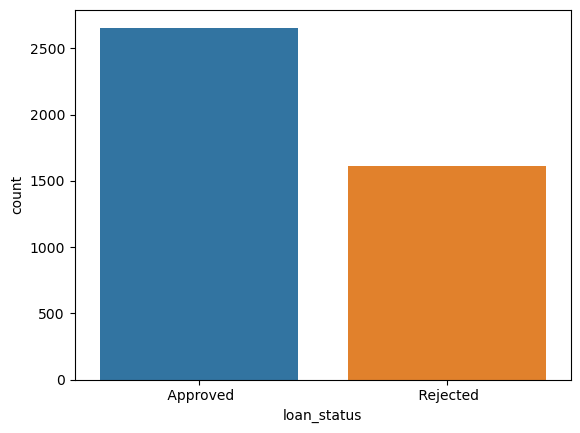

In [14]:
#Checking for class imbalance

sns.countplot(x ='loan_status',data=df)

No class imbalance

In [15]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

#### Check the distribution of each columns

/home/vs/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vs/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vs/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

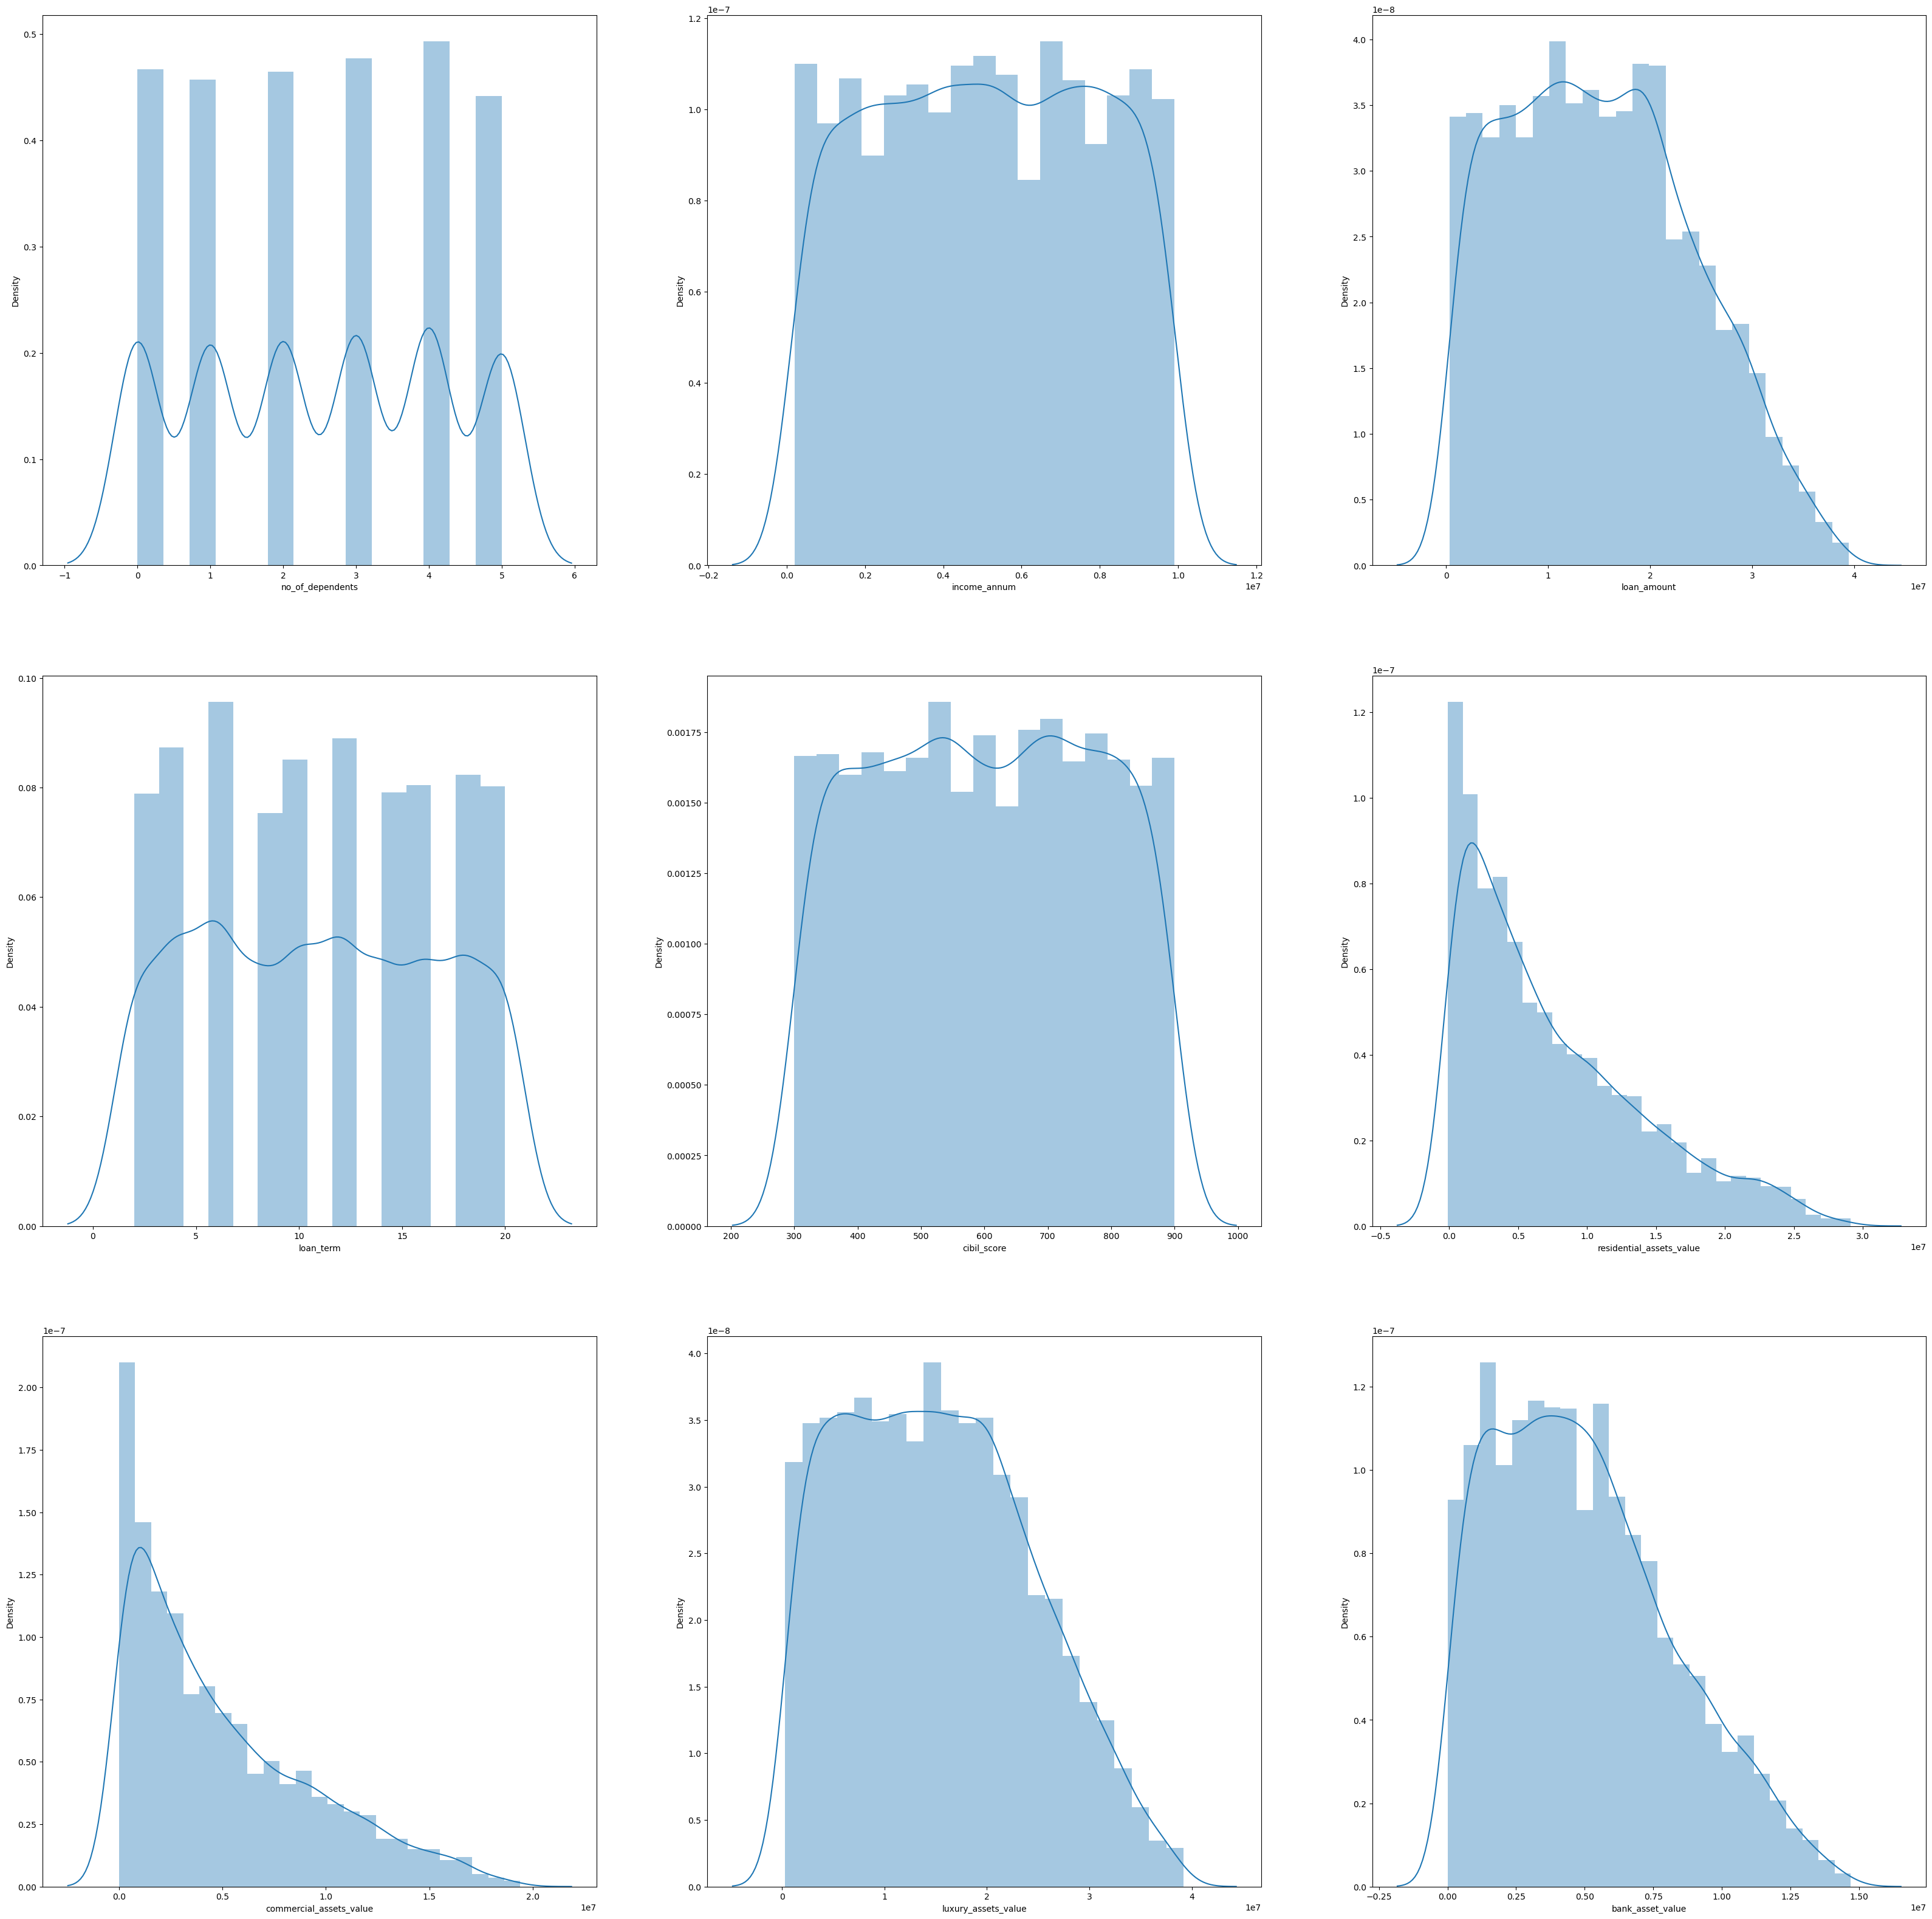

In [16]:

cols = ['no_of_dependents', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']
fig, axes = plt.subplots(nrows = 3, ncols = 3)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, cols):
    sns.distplot(df[col], ax = ax)


In [17]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

<AxesSubplot:xlabel='education', ylabel='count'>

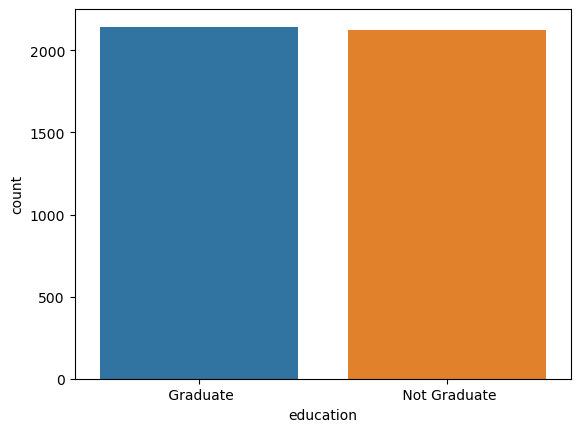

In [18]:
#Distribution of education
sns.countplot(x = 'education', data = df)

<AxesSubplot:xlabel='self_employed', ylabel='count'>

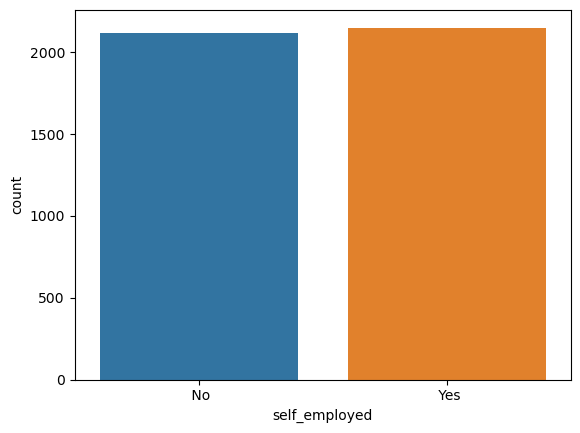

In [19]:
#Distribution of Self_employeed
sns.countplot(x = 'self_employed', data = df)

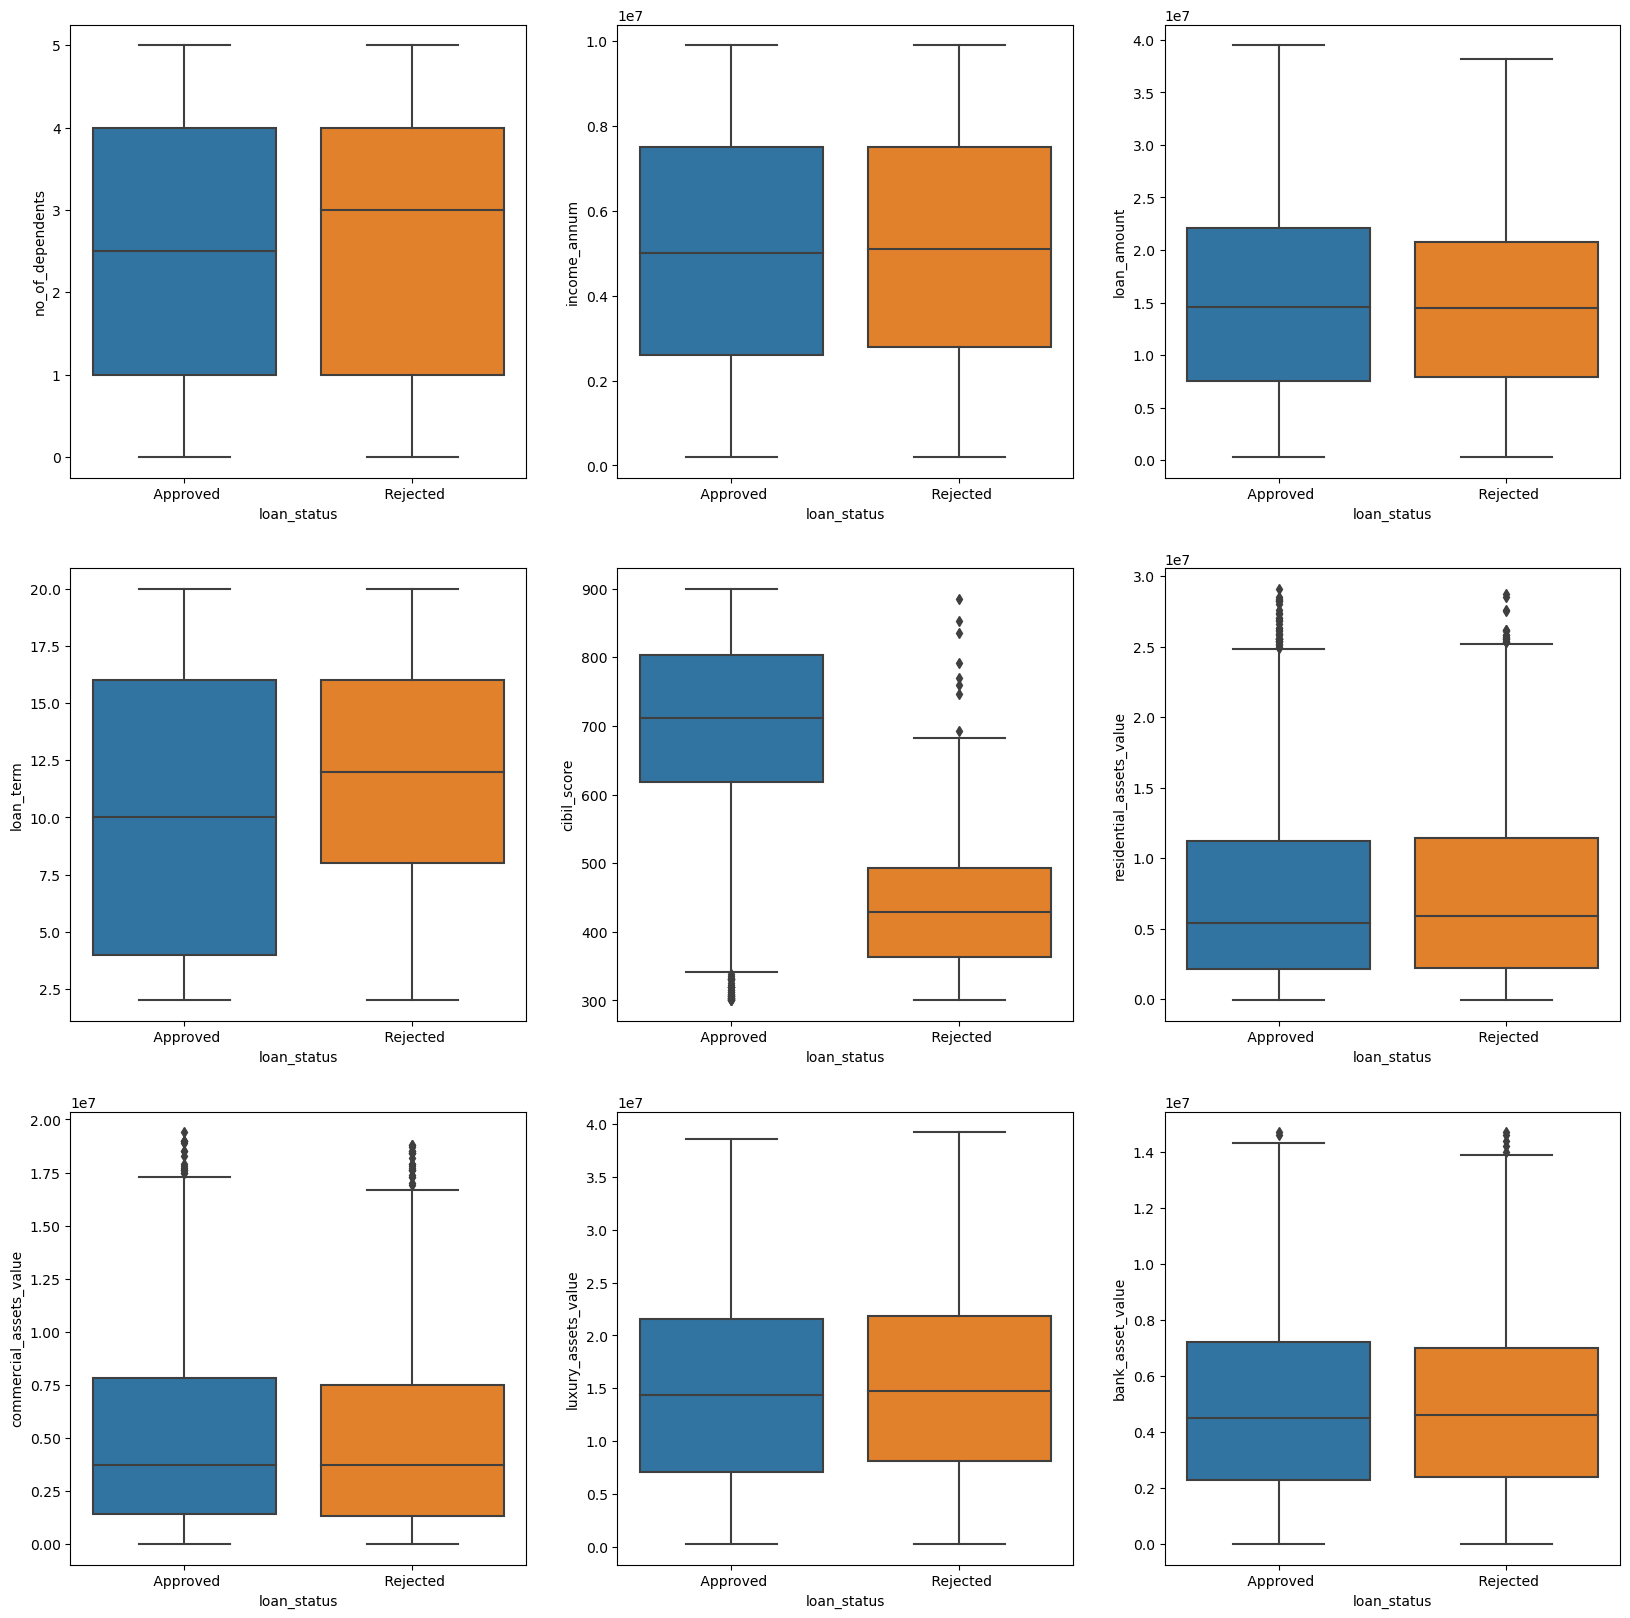

In [20]:
#checking for outliers

cols = ['no_of_dependents', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']
fig, axes = plt.subplots(nrows = 3, ncols = 3)    
axes = axes.flatten()         
fig.set_size_inches(20,20)

for ax, col in zip(axes, cols):
    sns.boxplot(x='loan_status',y=df[col], ax = ax , data=df)

<AxesSubplot:xlabel='cibil_score', ylabel='commercial_assets_value'>

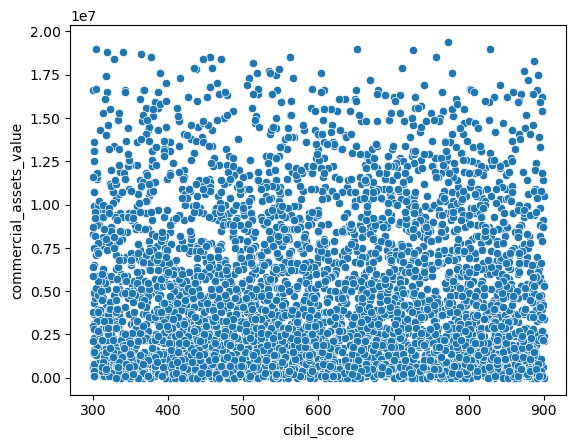

In [21]:
#' commercial_assets_value', ' cibil_score' have outliers, checking that one
sns.scatterplot(x = 'cibil_score', y = 'commercial_assets_value', data = df)

<AxesSubplot:>

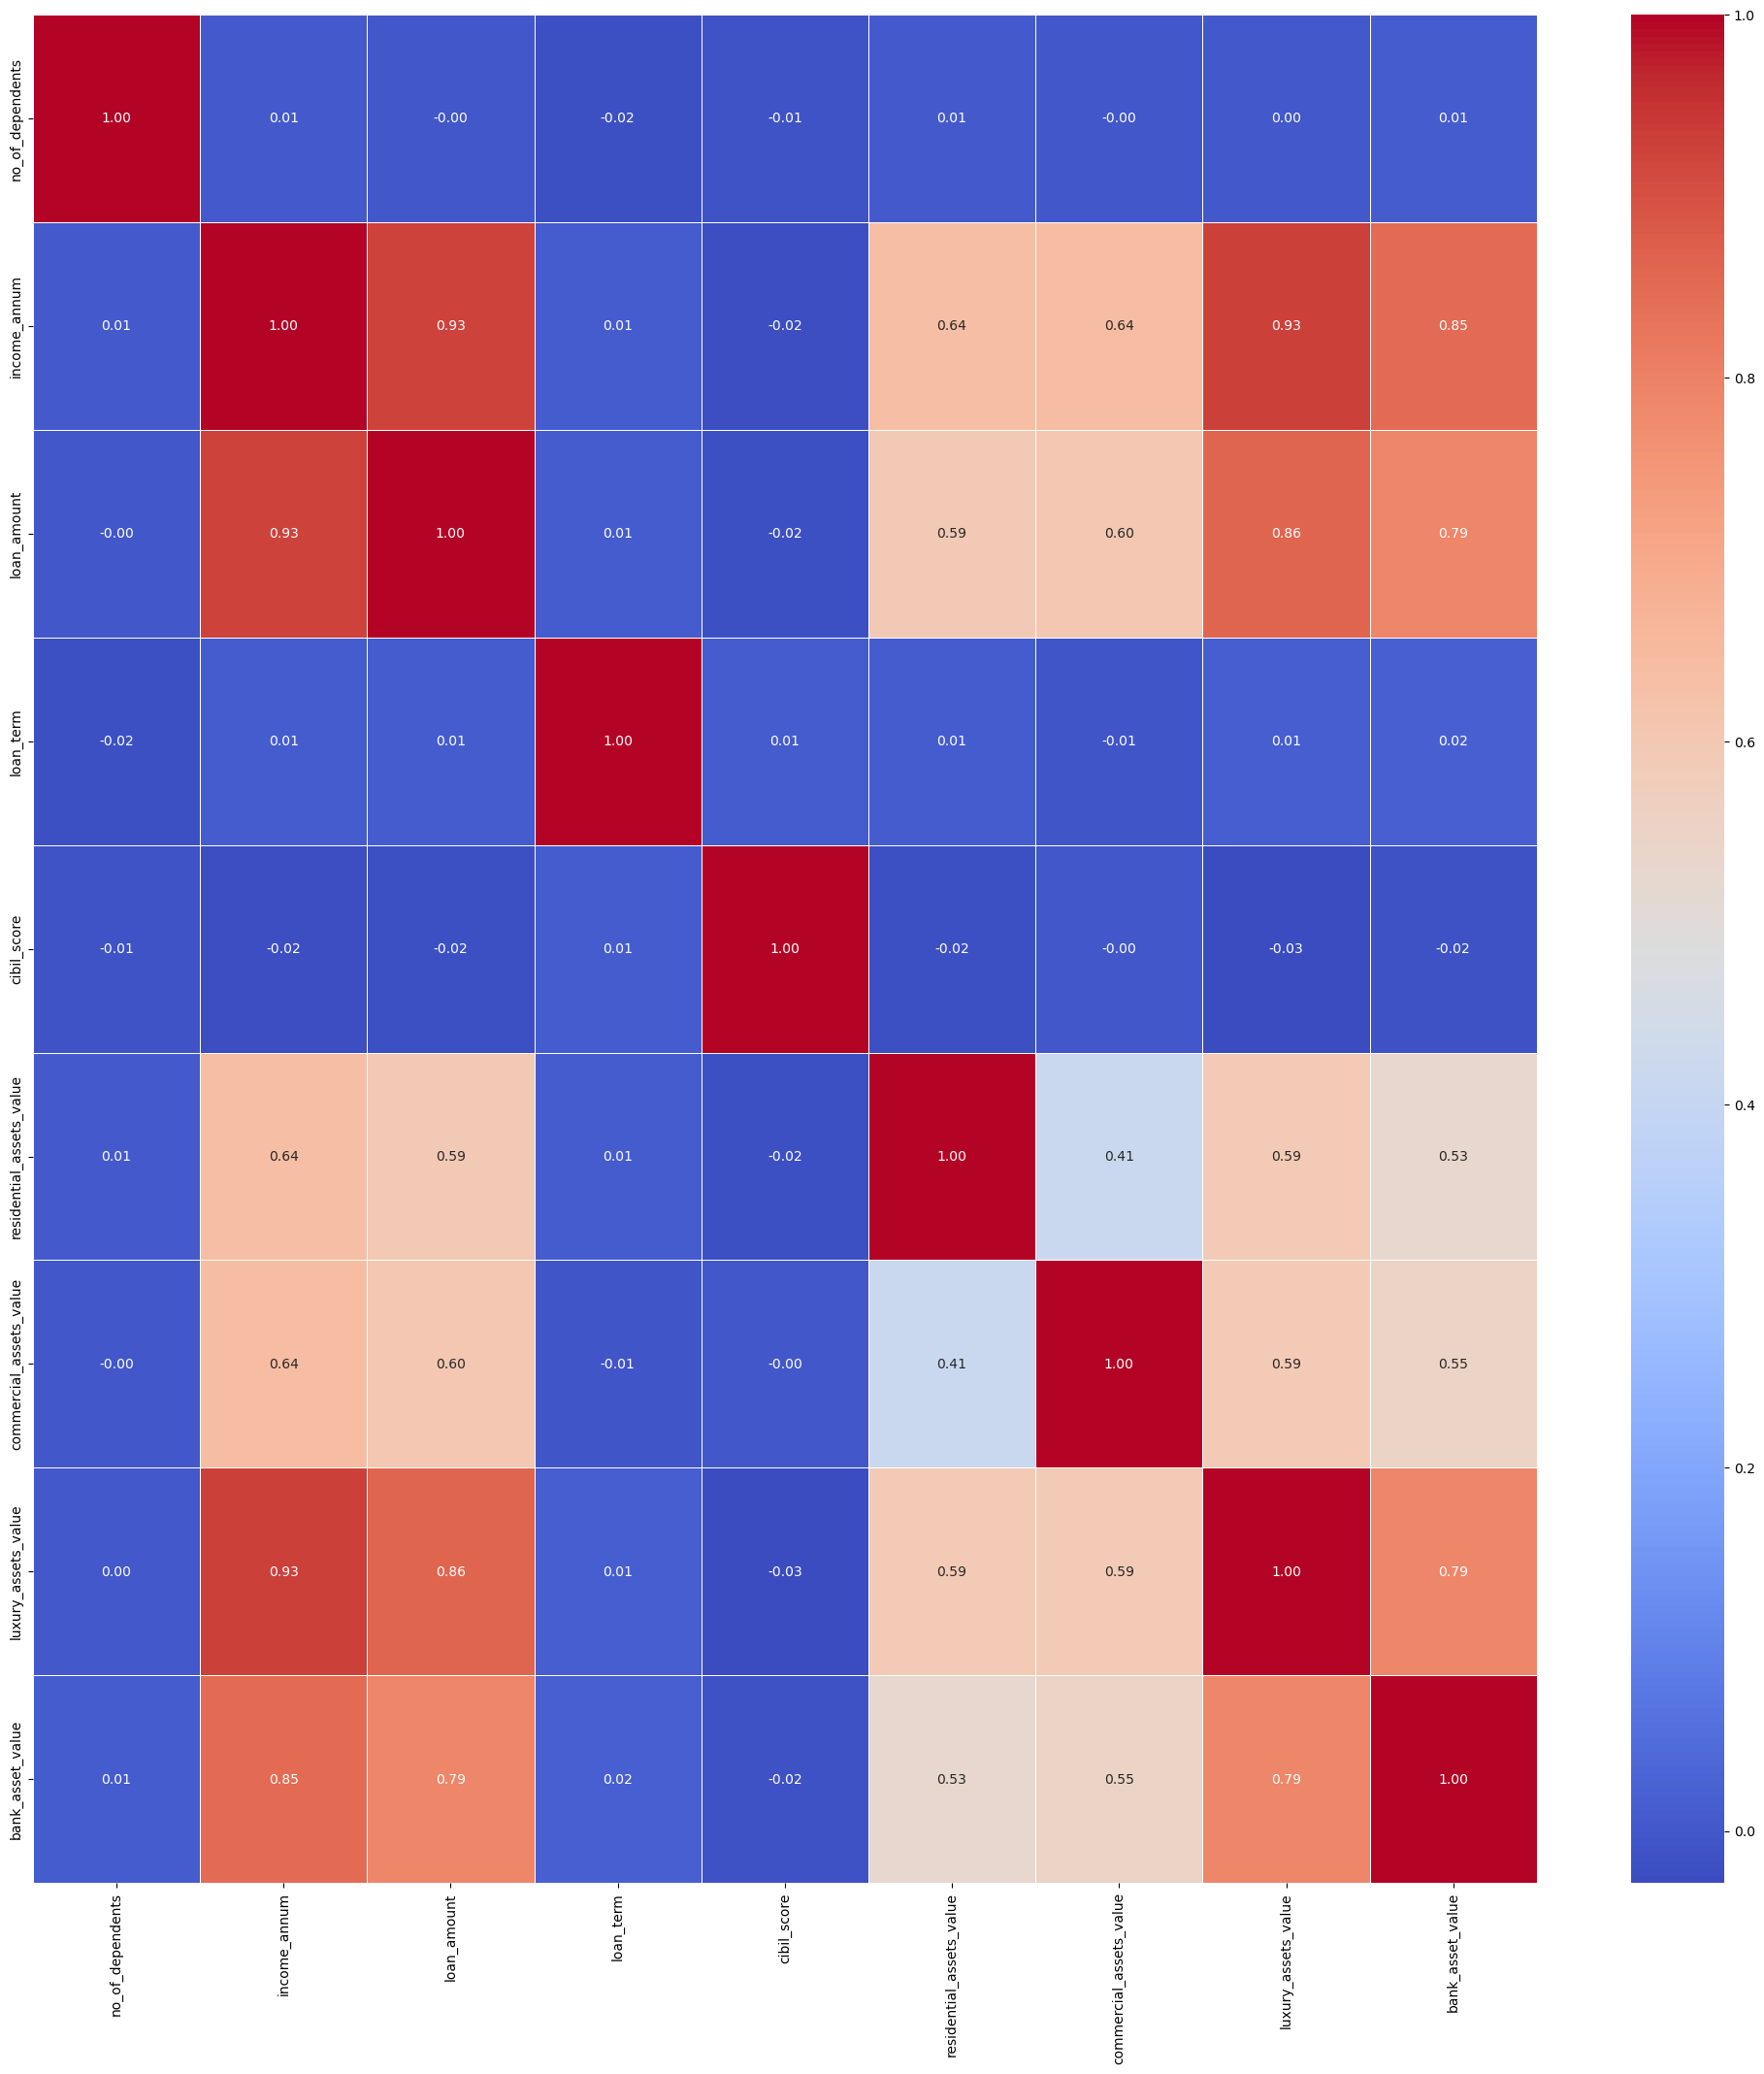

In [22]:
#Checking correlation
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')


**We can see that income_annum and luxury_assets_value are highly correlated (0.93). So we can drop Luxury_assets_value feature.**

**We can also see that income_annum and loan_amount are highly correlated (0.93). So we can drop one but here I'm not going to drop it, because loan approval may depend on indivisual income as well as the load amount**

In [23]:
#Droping the 'luxury_assets_value' col
df.drop(['luxury_assets_value'], axis = 1, inplace = True)

In [24]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

# Step3: Data Preparation and Model Training

**Here our model task is to predict the loan status which is a classification problem. So we try classification ML Algo/model. Like-<br> Logistic Regression <br> Decision Tree <br> Random Forest <br> Support Vector <br> XGBoost**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [26]:
#Independent Features
X = df.drop(columns=['loan_status'])
X.shape

(4269, 10)

In [27]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)
X.shape

(4269, 12)

In [28]:
# # Encode target variable (Approved: 1, Rejected: 0)
# le = LabelEncoder()
# y = le.fit_transform(y)
rank=[' Rejected',' Approved']
oe = OrdinalEncoder(categories=[rank])
y = oe.fit_transform(df[['loan_status']])

In [29]:
# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.905152224824356
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       318
         1.0       0.92      0.93      0.92       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



/home/vs/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("\nDecision Trees Accuracy:", dt_accuracy)
print("Decision Trees Classification Report:")
print(classification_report(y_test, dt_predictions))


Decision Trees Accuracy: 0.9812646370023419
Decision Trees Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       318
         1.0       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [33]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

/tmp/ipykernel_16887/4257642335.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)



Random Forest Accuracy: 0.9789227166276346
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       318
         1.0       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [34]:
# Support Vector Machines (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("\nSupport Vector Machines Accuracy:", svm_accuracy)
print("Support Vector Machines Classification Report:")
print(classification_report(y_test, svm_predictions))


Support Vector Machines Accuracy: 0.9238875878220141
Support Vector Machines Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       318
         1.0       0.95      0.93      0.94       536

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



/home/vs/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
# Gradient Boosting (XGBoost)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("\nGradient Boosting (XGBoost) Accuracy:", xgb_accuracy)
print("Gradient Boosting (XGBoost) Classification Report:")
print(classification_report(y_test, xgb_predictions))


Gradient Boosting (XGBoost) Accuracy: 0.9836065573770492
Gradient Boosting (XGBoost) Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       318
         1.0       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



#### Conclusion

The performance of tree based model for this dataset is good. <br>
For Decision tree, Random Forest, and XGBoost, weighted F1-Score is good.